In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

# Scraped data from Opindia News Website

In [2]:
import requests
from bs4 import BeautifulSoup
url = "https://www.opindia.com/latest-news/"
data = requests.get(url)

In [3]:
data

<Response [200]>

In [4]:
soup = BeautifulSoup(data.content,"html.parser")

# Created function for fetching article with URL

In [5]:
def fetch_article(url):
    data = requests.get(url)
    soup = BeautifulSoup(data.content,"html.parser")
    articles = []
    for i in soup.find_all("h3",class_ = ["entry-title td-module-title"]):
        articles.append(i.find('a')['title'])     
    return articles

# Created URL list

In [6]:
urllist = []
for i in range(2,21,1):
    url = "https://www.opindia.com/latest-news/page/" + str(i) + "/"
    urllist.append(url)

# Using fetch articles function - fetched the data

In [7]:
all_articles = []
for i in urllist:
    all_articles.extend(fetch_article(i))

In [8]:
all_articles[1:200]

['‘State sponsored murder’: AAP govt in Punjab faces widespread condemnation after murder of Sidhu Moose Wala following withdrawal of his security',
 'Punjabi singer and Congress leader Sidhu Moosewala shot dead, AAP government withdrew his security yesterday',
 '‘There will be no Namaz on streets in Uttar Pradesh, removal of loudspeakers have brought great relief to people’: UP CM Yogi Adityanath',
 'The Atlantic fear mongers about ‘Hinduisation’ of India, suggests Muslims who stayed back after partition took a wrong decision',
 'Threats to Nupur Sharma once again show how ‘Indian Muslim genocide alert’ is a smokescreen created to hide the ugly truth',
 'The New York Times outdoes itself in stupidity, says India was partitioned ‘from Pakistan’\xa0',
 'Islamist violence: How 2022 Ramzan was a month of Islamist violence not just for India but several other countries as well',
 'How the ‘opposition’ has extraordinary powers that they use to scuttle voices of dissent as ‘journalists’ rejo

# Tokenization and Stemming

In [9]:
p_art=[]
for i in all_articles:
    q=i.upper()
    import re
    q=re.sub('[^A-Z0-9 ]','',q)
    from nltk.stem import PorterStemmer
    tk_q=q.split(" ")
    sent=""
    for j in tk_q:
        ps=PorterStemmer()
        sent=sent+" "+ps.stem(j).upper()
    p_art.append(sent)

In [10]:
p_art[1:200]

[' STATE SPONSOR MURDER AAP GOVT IN PUNJAB FACE WIDESPREAD CONDEMN AFTER MURDER OF SIDHU MOOS WALA FOLLOW WITHDRAW OF HI SECUR',
 ' PUNJABI SINGER AND CONGRESS LEADER SIDHU MOOSEWALA SHOT DEAD AAP GOVERN WITHDREW HI SECUR YESTERDAY',
 ' THERE WILL BE NO NAMAZ ON STREET IN UTTAR PRADESH REMOV OF LOUDSPEAK HAVE BROUGHT GREAT RELIEF TO PEOPL UP CM YOGI ADITYANATH',
 ' THE ATLANT FEAR MONGER ABOUT HINDUIS OF INDIA SUGGEST MUSLIM WHO STAY BACK AFTER PARTIT TOOK A WRONG DECIS',
 ' THREAT TO NUPUR SHARMA ONC AGAIN SHOW HOW INDIAN MUSLIM GENOCID ALERT IS A SMOKESCREEN CREAT TO HIDE THE UGLI TRUTH',
 ' THE NEW YORK TIME OUTDO ITSELF IN STUPID SAY INDIA WA PARTIT FROM PAKISTAN',
 ' ISLAMIST VIOLENC HOW 2022 RAMZAN WA A MONTH OF ISLAMIST VIOLENC NOT JUST FOR INDIA BUT SEVER OTHER COUNTRI AS WELL',
 ' HOW THE OPPOSIT HA EXTRAORDINARI POWER THAT THEY USE TO SCUTTL VOIC OF DISSENT AS JOURNALIST REJOIC OR LOOK THE OTHER WAY',
 ' DEAR LIBER THE BLOOD OF TEXA CHILDREN IS ON YOUR ALREADI BLOODSOAK HAND 

# TF-IDF Vectorizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
A=tf.fit_transform(p_art).toarray()
A[1:200]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Elbow Method

In [12]:
from sklearn.cluster import KMeans
wcss=[]
k= range(1,20,1)
for i in k:
    km=KMeans(n_clusters=i) 
    model=km.fit(A)
    wcss.append(model.inertia_)

# Visualizing Elbow Curve

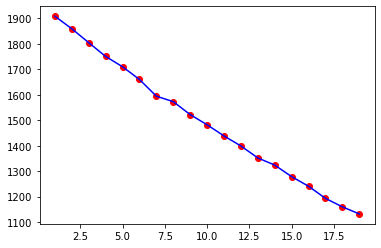

In [13]:
import matplotlib.pyplot as plt
plt.scatter(k,wcss,c='red')
plt.plot(k,wcss,c='blue')

# K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
clusters_=km.fit(A)

In [15]:
clusters_.labels_

array([3, 4, 2, ..., 1, 1, 1])

# Creating DataFrame with cluster_labels and articles

In [16]:
Q1=pd.DataFrame(p_art,columns=['Articles'])
Q1['Clusters']=clusters_.labels_
Q1.head(20)

,Articles,Clusters
0,LOCAL BU DRIVER JUMP OFF A BU WHILE 7 SOLDIER...,3
1,STATE SPONSOR MURDER AAP GOVT IN PUNJAB FACE ...,4
2,PUNJABI SINGER AND CONGRESS LEADER SIDHU MOOS...,2
3,THERE WILL BE NO NAMAZ ON STREET IN UTTAR PRA...,0
4,THE ATLANT FEAR MONGER ABOUT HINDUIS OF INDIA...,4
5,THREAT TO NUPUR SHARMA ONC AGAIN SHOW HOW IND...,1
6,THE NEW YORK TIME OUTDO ITSELF IN STUPID SAY ...,4
7,ISLAMIST VIOLENC HOW 2022 RAMZAN WA A MONTH O...,0
8,HOW THE OPPOSIT HA EXTRAORDINARI POWER THAT T...,1
9,DEAR LIBER THE BLOOD OF TEXA CHILDREN IS ON Y...,0


# Creating Dictionary

In [17]:
E={0:'Cluster 1',
    1:'Cluster 2',
    2:'Cluster 3',
    3:'Cluster 4',
    4 :'Cluster 5'}

# Cluster names to Clusters

In [18]:
R=[]
for i in Q1.Clusters:
    R.append(E[i])
Q1['Category']=R

In [19]:
Q1.head(20)

,Articles,Clusters,Category
0,LOCAL BU DRIVER JUMP OFF A BU WHILE 7 SOLDIER...,3,Cluster 4
1,STATE SPONSOR MURDER AAP GOVT IN PUNJAB FACE ...,4,Cluster 5
2,PUNJABI SINGER AND CONGRESS LEADER SIDHU MOOS...,2,Cluster 3
3,THERE WILL BE NO NAMAZ ON STREET IN UTTAR PRA...,0,Cluster 1
4,THE ATLANT FEAR MONGER ABOUT HINDUIS OF INDIA...,4,Cluster 5
5,THREAT TO NUPUR SHARMA ONC AGAIN SHOW HOW IND...,1,Cluster 2
6,THE NEW YORK TIME OUTDO ITSELF IN STUPID SAY ...,4,Cluster 5
7,ISLAMIST VIOLENC HOW 2022 RAMZAN WA A MONTH O...,0,Cluster 1
8,HOW THE OPPOSIT HA EXTRAORDINARI POWER THAT T...,1,Cluster 2
9,DEAR LIBER THE BLOOD OF TEXA CHILDREN IS ON Y...,0,Cluster 1


In [20]:
cluster1=Q1[Q1.Category=='Cluster 1'].Articles
cluster1

3        THERE WILL BE NO NAMAZ ON STREET IN UTTAR PRA...
7        ISLAMIST VIOLENC HOW 2022 RAMZAN WA A MONTH O...
9        DEAR LIBER THE BLOOD OF TEXA CHILDREN IS ON Y...
10       FACT CHECK DOE GANGSTER GOLDI BRAR HAVE A CON...
17       STOP REPORT OR BEAR CONSEQU PFI GOON THREATEN...
                              ...                        
1908     DEAR LIBER THE BLOOD OF TEXA CHILDREN IS ON Y...
1909     FACT CHECK DOE GANGSTER GOLDI BRAR HAVE A CON...
1916     STOP REPORT OR BEAR CONSEQU PFI GOON THREATEN...
1920     BHOJSHALA AN EDUC CENTR AND A HISTOR TEMPL OF...
1924     HAVE AN OPINION ON PROPHET MUHAMMAD IS NOT DE...
Name: Articles, Length: 270, dtype: object